<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

El área de visualización se define como las técnicas que nos permiten obtener una representación gráfica de la información. 

La visualización toma especial importancia a la hora de transmitir un mensaje claro a clientes, personal investigador, pacientes y, en general, usuarios de un proceso o aplicación en el que se trabaja con datos.

Antes de comenzar a trabajar con visualizaciones vamos a explorar ciertos conceptos que nos permitan realizar una visualización clara.

Una buena visualización contendrá generalmente los siguientes atributos:

- Claridad: Una buena visualización es capaz de mostrar con claridad un mensaje que de otra forma sería difícil de explicar con palabras. Conexiones y conclusiones complejas extraídas de los datos se muestran de forma clara a través de la visualización.

- Transformación de datos: Los datos de entrada a la visualización son tratados de forma apropiada para apoyar el concepto que se pretende ilustrar.

- Diseño: Una buena visualización tiene en cuenta la paleta de colores y el contraste entre estos para apoyar a su mensaje. El uso de formas y marcadores puede también apoyar la construcción de la visualización.

- Conocimiento del Dataset: Una buena visualización es siempre coherente con el conjunto de datos que se utiliza a la entrada y muestra valores razonables dentro de las variables que se utilizan para construir las gráficas.

- Texto y etiquetas: Una buena visualización contiene en si misma toda la información necesaria para ser interpretada, incluyendo texto y etiquetas en ejes y puntos que sean necesarias para su interpretación.


Durante esta clase utilizaremos las librerías **pandas** (para procesar los datos) y **seaborn** para construir las gráficas.

In [2]:
# Como importar las librerías
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)

In [4]:
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


# Gráficos de nubes de puntos

Los gráficos de nubes de puntos (scatterplot) utilizan puntos para representar valores con respecto a dos o tres variables diferentes. Estos gráficos tienen su utilidad cuando interesa representar una relación entre dos o tres variables sin que estas presenten un orden determinado.

Vamos a realizar un ejemplo utilizando las variables de longitud de las aletas(flipper_length_mm) y el peso de los pingüinos (body_mass_g).

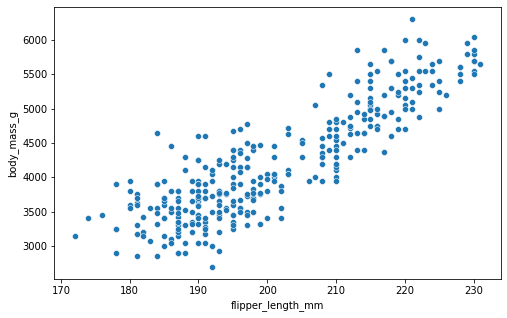

In [5]:
plt.figure(figsize=(8,5)) # Definid siempre la figura primero usando matplotlib
sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g")

Como se puede apreciar parece que existe una relación clara entre la longitud de las aletas de un pingüino. Sin embargo, cabría la opción de preguntarse si además existe alguna relación a tener en cuenta con el sexo de los pingüinos. Para representar valores categóricos o discretos sin aumentar la dimensionalidad de una gráfica scatter plot se puede recurrir a cambiar los colores o formas de los puntos representados.

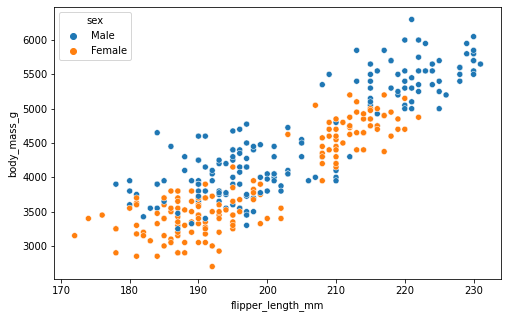

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g", hue="sex")

# Ejercicio:

Suponed que trabajáis para una empresa de transporte de animales y necesitáis información para decidir el tamaño de la flota de transportes que vais a enviar en función del peso de los pingüinos.

Sin embargo, la única información que se os proporcionará es la especie de pingüino. Dibujad una visualización utilizando las variables, flipper_length_mm, body_mass_g y species que os permita tomar esta decisión utilizando la función sns.scatterplot.

In [ ]:
# Escribid aquí vuestro código

# Representar Texto en un Scatterplot (u otro gráfico)

A menudo será frecuente necesitar representar algo de texto al lado de los valores especialmente interesantes en nuestras visualizaciones. Esto puede realizarse de forma simple de la siguiente manera.

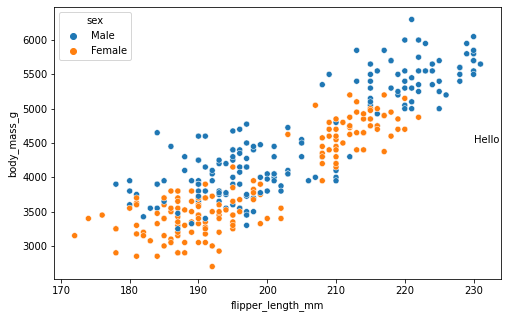

In [7]:
plt.figure(figsize=(8,5))
plt.text(x=230, y=4500, s="Hello")
sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g", hue="sex")

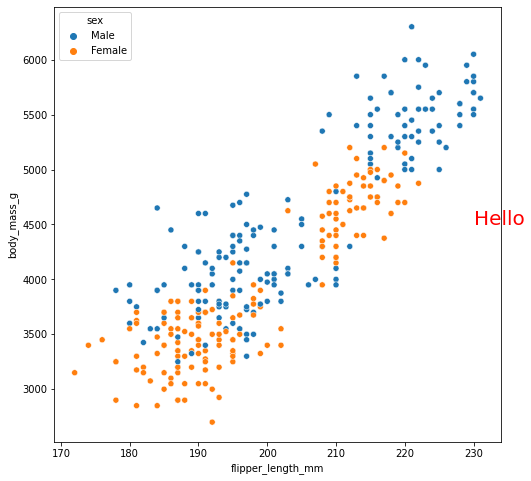

In [8]:
# Para alterar el tamaño de la fuente y el color del texto
# utilizaremos el parámetro fontdict
fontdict = {"color": "red", "size":20}
fig = plt.figure(figsize=(8,8))
plt.text(x=230, y=4500, s="Hello", fontdict=fontdict)
sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g", hue="sex")

# Ejercicio

Encontrad al pingüino de mayor peso y colocadle al lado una etiqueta de texto con la frase "Mayor Peso".

In [ ]:
# Escribid aquí vuestro código

# Gráficos de Lineas

Los gráficos de líneas permiten representar la evolución de una variable respecto a otra u otras. Es necesario pues para que el gráfico de líneas tenga sentido que exista cierto orden entre las variables que se intentan representar. 

In [9]:
dataset = sns.load_dataset("flights")
grouped_df = dataset.groupby("year").sum()

In [10]:
grouped_df.head(5)

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700


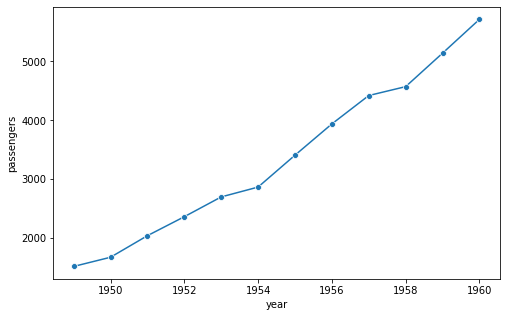

In [11]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(data=grouped_df, x="year", y="passengers", marker="o")

# Ejercicio
Utilizad el siguiente dataset para representar la evolución de la media de potencia en los modelos de motor de misma cilindrada a lo largo de las décadas. Para ello:

- Calculad la media de la potencia utilizando como variables de agrupación cylinders y model_year. Pasad las variables de agrupación como una lista al método groupby y calculad la media con .mean()

- La evolución será diferente para cada tipo de motor en función de sus cilindros, para representar las diferentes líneas con diferentes colores podéis volver a utilizar el argumento hue usado en el ejercicio de los pingüinos.

In [12]:
# Escribid aquí vuestro código
dataset = sns.load_dataset("mpg")

# Dibujar una forma en un gráfico de líneas (u otro gráfico)

A veces puede ser interesante representar una forma particular (como un círculo) para resaltar cierta área del gráfico.

In [13]:
dataset = sns.load_dataset("flights")
grouped_df = dataset.groupby("year").sum()

## Gráfica Cuadrada

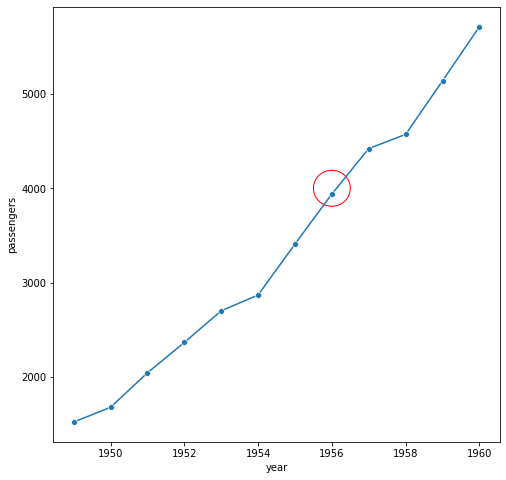

In [15]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(data=grouped_df, x="year", y="passengers", marker="o")
x_radius = 1
#Obtenemos el rango del eje
x_axis = fig.axes[0].get_xlim()
y_axis = fig.axes[0].get_ylim()
#Calculamos anchura y altura de la gráfica
x_width = x_axis[1]-x_axis[0]
y_height = y_axis[1]-y_axis[0]
#Calculamos el radio en y en función de x
y_radius = x_radius*y_height/x_width
a = patches.Ellipse((1956, 4000), x_radius, y_radius, fill=False, color="red")
fig.axes[0].add_patch(a)

## Gráfica Rectangular

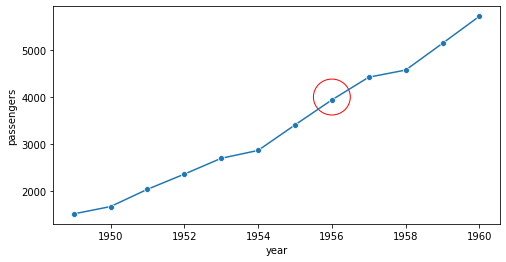

In [18]:
fig = plt.figure(figsize=(8,4))
sns.lineplot(data=grouped_df, x="year", y="passengers", marker="o")
x_radius = 1
#Obtenemos el rango del eje
x_axis = fig.axes[0].get_xlim()
y_axis = fig.axes[0].get_ylim()
#Calculamos anchura y altura de la gráfica
x_width = x_axis[1]-x_axis[0]
y_height = y_axis[1]-y_axis[0]
#Calculamos el radio en y en función de x
y_radius = x_radius*(y_height/x_width)*(8/4)
a = patches.Ellipse((1956, 4000), x_radius, y_radius, fill=False, color="red")
fig.axes[0].add_patch(a)

In [16]:
a = fig.axes[0]
print(a.get_ylim())
print(a.get_xlim())

(1310.3, 5923.7)
(1948.45, 1960.55)


# Ejercicio

Utilizando como base la gráfica anterior dibujad un círculo verde y rojo sobre los valores máximo y mínimo de la gráfica de líneas. Probad a realizarlo sobre un gráfico cuadrado y rectangular.

In [ ]:
#Esccribid aquí vuestro código

# Histogramas

Un histograma es una aproximación de la distribución de una variable mediante rectángulos (bins) cuya área es proporcional a la frecuencia de un valor de la variable. 

Es importante recalcar que un histograma en ningún momento nos permitirá conocer una distribución real de la variable, pero puede aportar una primera aproximación de como los valores de la variable quedan dispuestos y si estos tienen sentido.

In [87]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)

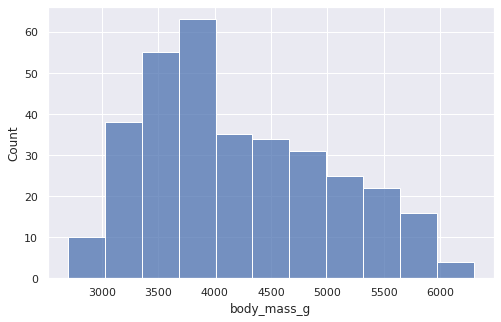

In [92]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x="body_mass_g")

Los histogramas tienen dos parámetros que sin importantes tunear para obtener una representación apropiada. Estos parámetros son:

- bins: Número de bins o rectángulos que se van a utilizar para representar el histograma.

- binwidth: Tamaño de los bins (longitud de la base del rectángulo). Representa el rango de valores que se utilizará para calcular la altura del rectángulo.

Estos parámetros son mutuamente excluyentes y al definir uno el otro queda automáticamente definido. 

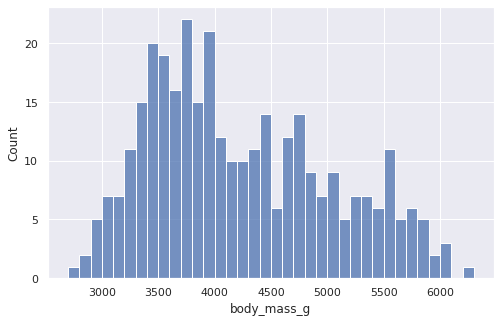

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x="body_mass_g", binwidth=100)

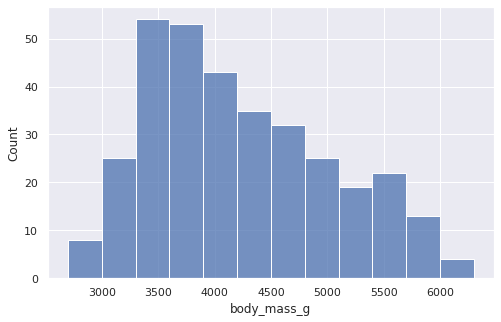

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x="body_mass_g", bins=12)

Es común preguntarse pues. ¿Cúal es el número apropiado de bins que se debe determinar en un histograma? Generalmente esta es una pregunta difícil. Tal y como comentábamos antes calcular la distribución real a través del histograma no es una buena idea, existen diversas reglas que pueden aplicarse y basándose en los fundamentos de la estadística nos proporciona este número.

Cuando permitimos que Seaborn calcule automáticamente el número de bins aplica una de estas reglas. En concreto calcula dos de ellas y utiliza el mayor valor obtenido entre ambas.

Estas reglas son:

Fredman-Diaconis Rule:
https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

Sturges Rule:
https://es.wikipedia.org/wiki/Regla_de_Sturges

No vamos a entrar a conocer o derivar estas reglas en esta clase, pero para aquellos que tengáis interés en conocer los métodos aplicados automáticamente por seaborn os dejo enlaces de referencia que podéis consultar.


# Heatmaps

Los mapas de calor son el resultado de generalizar el concepto de histograma a las dos dimensiones. Al igual que en el caso anterior se calculan bins, pero en este caso para dos variables, al propagarse estos bins por cada uno de los ejes los rectángulos se terminan cruzando. Las áreas donde se encuentra una mayor densidad de puntos son representados con colores que en contraste resultan más llamativos con respecto al resto del mapa de calor.

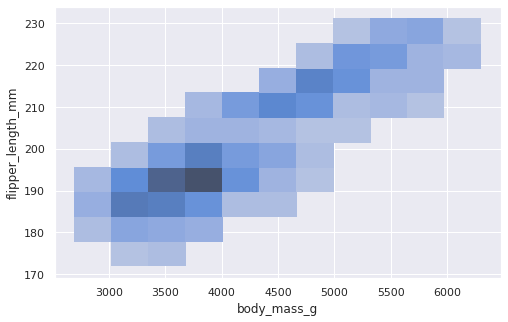

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x="body_mass_g", y="flipper_length_mm")

# Ejercicio

Practicad a construir heatmaps y un histogramas con las variables restantes del dataset de pingüinos y comprobad como se hayan distribuidos estos en función del peso y el resto de datos de su anatomía.

¿Se podría utilizar las visualizaciones obtenidas para calcular el tamaño de la flota de transporte?

In [ ]:
#Escribid aquí vuestro código

# Cambiar el mapa de color de un heatmap

Cuando dibujamos un mapa de color es importante el contraste que se obtiene 

